In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cramer_rao import *

In [2]:
P,Q = 8,8 # rows and columns of antenna array
lamda = 1 # wavelength
ue = 1  # number of user equipments
ris = 1  # number of RIS
n_source = ue+ris
n_antenna = P*Q  # number of antenna elements 
snr = 10
frequency = 3e8
duration = 5
sampling_rate=50 
speed= frequency*lamda
numAngles = 360
numrealization = 100 # number of time samples collected at antenna array
signal_samples = 10


In [40]:
ris_pos = np.array([0.006067509241204117, 2.7744162567926823e-05, 0.9999815921115095])
ue_pos = np.array([0.016251992379168842, 0.0014675892375824373, 0.999866850598387])
ris_pos = [1000, 1000, 1000]
# ue_pos = [10, 99, 10]
lr = 0.0614
lamda = 0.06/(360/np.deg2rad(360)) # wavelength
frequency = 5e9
w = np.deg2rad(360)*frequency
k = np.sqrt(2)
c = lamda*frequency

In [42]:
arr = []
for i in range(1,7):
    limit_x, limit_y, limit_z = cramer_limit(ris_pos, ue_pos, lr, w, np.sqrt(i), c)
    exp = np.sqrt((np.abs(limit_x)**2+np.abs(limit_y)**2+np.abs(limit_z)**2)/3)
    arr.append(exp)
    
    print(i, exp)

1 0.04612855165712936
2 0.18451420662860804
3 0.4151569649145714
4 0.7380568265151555
5 1.1532137914304963
6 1.6606278596607282


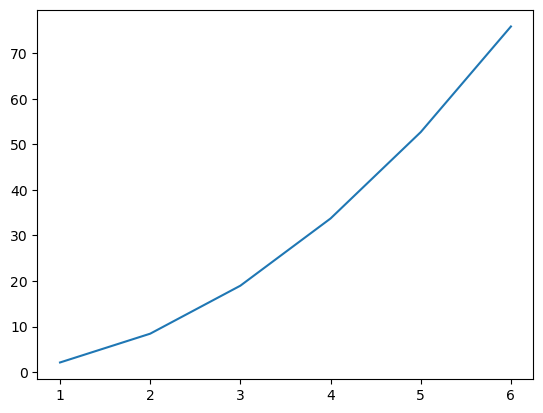

In [25]:
plt.plot(list(range(1,7)), arr)

Text(0.5, 0, 'Variance of Error in Phase')

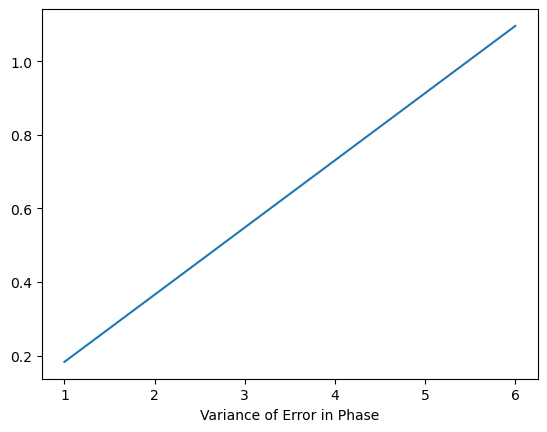

In [12]:
w = np.deg2rad(360)*frequency
plt.plot(np.array(range(1,7)), arr)
plt.xlabel('Variance of Error in Phase')

In [87]:
np.deg2rad(360)

6.283185307179586

In [66]:
3e8/5e9

0.06

In [34]:
limit_x, limit_y, limit_z = cramer_limit(ris_pos, ue_pos, lr, w, k, c)
limit_x, limit_y, limit_z

LinAlgError: Singular matrix

In [14]:
limit_x, limit_y, limit_z

(32656788.9594505, 2912902328.6709013, 11706318.180931551)

In [5]:
fisher_matrix, coff = fisher_info(ris_pos, ue_pos, lr, w, k, c) # shape: (3,3)
# cramer_limit = np.linalg.inv(fisher_matrix) # shape: (3,3)


In [7]:
fisher_matrix

array([[ 0.94836459,  0.13488467, -0.98457334],
       [ 0.13488467,  0.01918447, -0.14003459],
       [-0.98457334, -0.14003459,  1.02216454]])

In [11]:
np.linalg.det(fisher_matrix)

9.292642739747982e-35

In [16]:
np.linalg.inv(fisher_matrix)*(1/coff)**2

array([[ 0.01174968, -0.24382168, -0.02208554],
       [ 0.35870398, -1.48256809,  0.14240325],
       [ 0.06045933, -0.43796388, -0.00176434]])

In [16]:
cramer_limit

array([[ 3.26567890e+07, -3.00446636e+08, -9.70481610e+06],
       [-2.54748057e+08,  2.91290233e+09,  1.53682644e+08],
       [-3.44419792e+06,  1.09664679e+08,  1.17063182e+07]])

In [17]:
fisher_matrix

array([[ 5.97013309e+08,  8.49124315e+07, -6.19807394e+08],
       [ 8.49124315e+07,  1.20769854e+07, -8.81544048e+07],
       [-6.19807394e+08, -8.81544048e+07,  6.43471762e+08]])

In [20]:
path_diff_derivative = path_derivative(ris_pos, ue_pos) # shape: (3,1)
path_diff = compute_path_diff(ris_pos, ue_pos)
fisher_matrix = path_diff_derivative @ path_diff_derivative.T # shape: (3,3)

coff = ((1/(np.sqrt(2*np.pi)*path_diff))-((lr**2*w**2*path_diff)/(c**2*k**2)))**2
# fisher_matrix = fisher_matrix*coff # shape: (3,3)


In [22]:
path_diff

0.010286399576254435

In [19]:
coff

629518769.0286433

In [21]:
fisher_matrix

array([[ 0.94836459,  0.13488467, -0.98457334],
       [ 0.13488467,  0.01918447, -0.14003459],
       [-0.98457334, -0.14003459,  1.02216454]])

In [5]:
dl = pd.read_csv(os.path.join(os.getcwd(), 'data','dl_std.csv'))
nn = pd.read_csv(os.path.join(os.getcwd(), 'data','nn_std.csv'))
nsb = pd.read_csv(os.path.join(os.getcwd(), 'data','nsb_std.csv'))
capon = pd.read_csv(os.path.join(os.getcwd(), 'data','capon_std.csv'))
bartlett = pd.read_csv(os.path.join(os.getcwd(), 'data','bartlett_std.csv'))

In [64]:
std_df = pd.DataFrame(data=dl['std'].to_list(), columns=['std'])
std_df['dl'] = dl.lr.to_list()
std_df['nn'] = nn.lr.to_list()
std_df['nsb'] = nsb.lr.to_list()
std_df['capon'] = capon.lr.to_list()
std_df['bartlett'] = bartlett.lr.to_list()


In [65]:
std_df

,std,dl,nn,nsb,capon,bartlett
0,1,0.014706,0.014706,0.014706,0.014706,0.014706
1,2,0.756568,0.756568,0.243432,0.243432,0.243432
2,3,0.196762,0.196762,0.196762,0.196762,0.196762
3,4,0.006488,0.006488,0.006488,0.006488,0.006488
4,5,0.124581,0.124581,0.124581,0.124581,0.124581
5,6,0.821277,0.821277,0.178723,0.178723,0.178723
6,7,0.019499,0.019499,0.019499,0.019499,0.019499
7,8,0.245123,0.245123,0.245123,0.245123,0.754877
8,9,0.115715,0.115715,0.115715,0.115715,0.115715
9,10,0.410614,0.410614,0.589386,0.410614,0.589386


In [61]:
def plot(df):
    # plt.grid(True, axis='y')
    # plt.rc('axes', axisbelow=True)
    plt.bar(df['std'], df.lr*100)
    plt.plot(df['std'], df.lr*100, color='r')
    plt.ylabel('Localization Error(m)')
    plt.xlabel('STD of Noise of Phase')
    for i in dl['std'].to_list():
        plt.text(i, df.lr.to_list()[i-1]*100, round(df.lr.to_list()[i-1]*100,4))
    plt.show()
    return

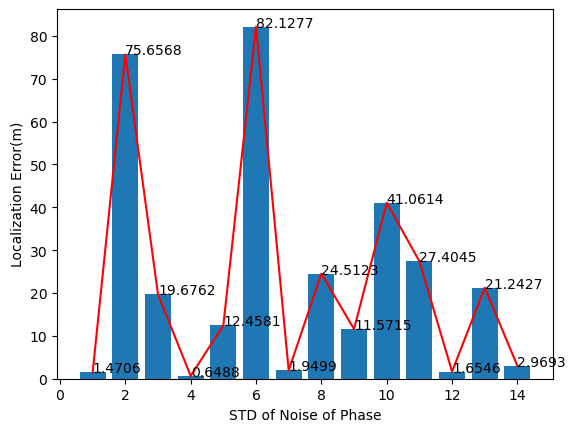

In [62]:
plot(dl)

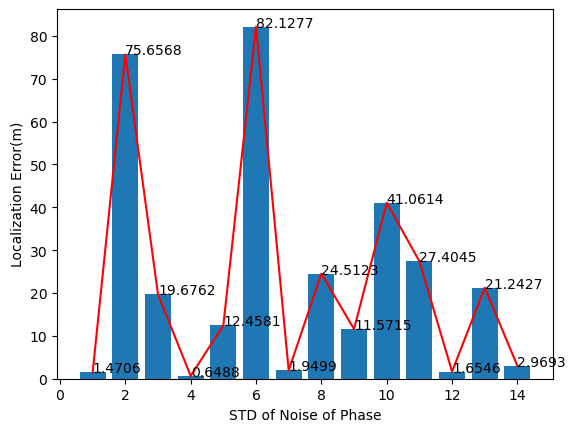

In [63]:
plot(nn)

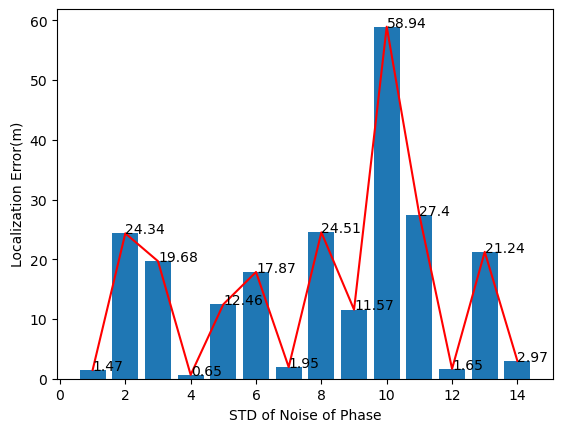

In [37]:
plot(nsb)

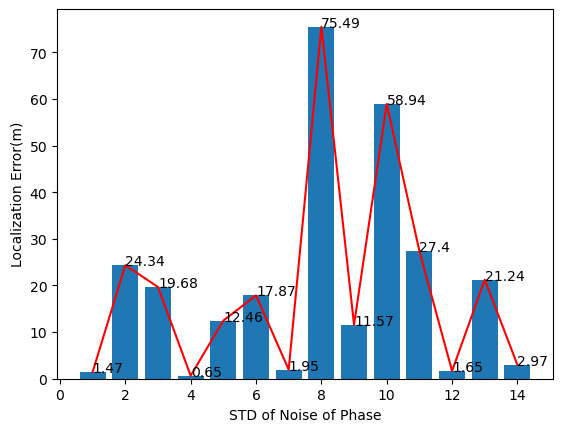

In [38]:
plot(bartlett)